In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [2]:
dataset = pd.read_csv("Patches.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
dataset

   Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      3                               258   
1       2590      2                               212   
2       2804      9                               268   
3       2785     18                               242   
4       2595      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Horizontal_Distance_To_Fire_Points   Tree  
0                                6279  Other  
1                                6225  Other  
2                                6121  Other  
3                                6211  Other  
4

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,Other
1,2590,2,212,-6,390,6225,Other
2,2804,9,268,65,3180,6121,Other
3,2785,18,242,118,3090,6211,Other
4,2595,2,153,-1,391,6172,Other
...,...,...,...,...,...,...,...
15115,2607,23,258,7,660,1282,Other
15116,2603,19,633,195,618,1325,Other
15117,2492,25,365,117,335,1187,Other
15118,2487,28,218,101,242,932,Other


In [3]:
# Converting Categorical features into Numerical features

dataset['Tree'] = dataset['Tree'].map({'Other':0, 'Spruce':1})
dataset

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,0
1,2590,2,212,-6,390,6225,0
2,2804,9,268,65,3180,6121,0
3,2785,18,242,118,3090,6211,0
4,2595,2,153,-1,391,6172,0
...,...,...,...,...,...,...,...
15115,2607,23,258,7,660,1282,0
15116,2603,19,633,195,618,1325,0
15117,2492,25,365,117,335,1187,0
15118,2487,28,218,101,242,932,0


In [4]:
dataset['Elevation'].median()

2752.0

In [5]:
# def converter_dataset(column):
#     if column <=2752:
#         return 0
#     else:
#         return 1
# dataset['Elevation']=dataset['Elevation'].apply(converter_dataset)
# dataset

In [6]:
dataset['Slope'].median()

15.0

In [7]:
def converter_slope(column):
    if column <=15:
        return 0
    else:
        return 1

dataset['Slope']=dataset['Slope'].apply(converter_slope)
dataset

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,0,258,0,510,6279,0
1,2590,0,212,-6,390,6225,0
2,2804,0,268,65,3180,6121,0
3,2785,1,242,118,3090,6211,0
4,2595,0,153,-1,391,6172,0
...,...,...,...,...,...,...,...
15115,2607,1,258,7,660,1282,0
15116,2603,1,633,195,618,1325,0
15117,2492,1,365,117,335,1187,0
15118,2487,1,218,101,242,932,0


In [8]:
X = dataset
X

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,0,258,0,510,6279,0
1,2590,0,212,-6,390,6225,0
2,2804,0,268,65,3180,6121,0
3,2785,1,242,118,3090,6211,0
4,2595,0,153,-1,391,6172,0
...,...,...,...,...,...,...,...
15115,2607,1,258,7,660,1282,0
15116,2603,1,633,195,618,1325,0
15117,2492,1,365,117,335,1187,0
15118,2487,1,218,101,242,932,0


In [9]:
# # Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [10]:

subset1 = X[['Horizontal_Distance_To_Roadways','Tree']]
subset2 = X[['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Tree']]
subset3 = X[['Horizontal_Distance_To_Fire_Points','Tree']]
subset4 = X[['Elevation','Slope','Horizontal_Distance_To_Roadways','Tree']]
subset5 = X[['Tree','Elevation','Horizontal_Distance_To_Fire_Points']]
subset6 = X[['Tree','Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points']]

In [11]:
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)

X2 = feature_scaler.fit_transform(subset2)

X3 = feature_scaler.fit_transform(subset3)

X4 = feature_scaler.fit_transform(subset4)

X5 = feature_scaler.fit_transform(subset5)

X6 = feature_scaler.fit_transform(subset6)

In [12]:
# # Analysis on Personal Data
# # Finding the number of clusters (K) - Elbow Plot Method
# inertia = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, random_state = 100)
#     kmeans.fit(X1)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('The Elbow Plot')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [13]:
# # Running KMeans to generate labels
# kmeans = KMeans(n_clusters = 3)
# kmeans.fit(X1)

In [14]:
# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =70,n_iter=3000)
# x_tsne = tsne.fit_transform(X1)

# Elevation = list(X['Elevation'])
# Slope = list(X['Slope'])
# Horizontal_Distance_To_Hydrology = list(X['Horizontal_Distance_To_Hydrology'])
# Vertical_Distance_To_Hydrology = list(X['Vertical_Distance_To_Hydrology'])
# Horizontal_Distance_To_Roadways = list(X['Horizontal_Distance_To_Roadways'])
# Horizontal_Distance_To_Fire_Points = list(X['Horizontal_Distance_To_Fire_Points'])
# Tree = list(X['Tree'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'Elevation: {a}; Slope: {b}; Horizontal_Distance_To_Hydrology:{c}, Vertical_Distance_To_Hydrology:{d}, Horizontal_Distance_To_Roadways:{e},Horizontal_Distance_To_Fire_Points:{f},Tree:{g}' 
#                                       for a,b,c,d,e,f,g in list(zip(Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dimension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE(d2,70,3000).html')

In [15]:
# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =50,n_iter=3000)
# x_tsne = tsne.fit_transform(X1)

# Horizontal_Distance_To_Roadways = list(X['Horizontal_Distance_To_Roadways'])
# Tree = list(X['Tree'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'Horizontal_Distance_To_Roadways:{a},Tree:{b}' 
#                                       for a,b in list(zip(Horizontal_Distance_To_Roadways,Tree))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dim
#                                  ension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE(d2,X1,50,3000).html')

In [16]:
# # Analysis on Personal Data
# # Finding the number of clusters (K) - Elbow Plot Method
# inertia = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, random_state = 100)
#     kmeans.fit(X2)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('The Elbow Plot')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [17]:
# # Running KMeans to generate labels
# kmeans = KMeans(n_clusters = 2)
# kmeans.fit(X2)

In [18]:
# # Analysis on Personal Data
# # Finding the number of clusters (K) - Elbow Plot Method
# inertia = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, random_state = 100)
#     kmeans.fit(X3)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('The Elbow Plot')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [19]:
# # Running KMeans to generate labels
# kmeans = KMeans(n_clusters = 2)
# kmeans.fit(X3)

In [20]:

# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =70,n_iter=4000)
# x_tsne = tsne.fit_transform(X3)

# hdt_fire = list(X['Horizontal_Distance_To_Fire_Points'])
# tree = list(X['Tree'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'hdt_fire:{a},tree:{b}' 
#                                       for a,b, in list(zip(hdt_fire,tree))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dimension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE(d2,X3,70,4000).html')

In [21]:
# # Analysis on Personal Data
# # Finding the number of clusters (K) - Elbow Plot Method
# inertia = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, random_state = 100)
#     kmeans.fit(X4)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(1, 11), inertia)
# plt.title('The Elbow Plot')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [22]:
# # Running KMeans to generate labels
# kmeans = KMeans(n_clusters = 2)
# kmeans.fit(X3)

In [23]:

# # Implementing t-SNE to visualize dataset
# tsne = TSNE(n_components = 2, perplexity =60,n_iter=8000)
# x_tsne = tsne.fit_transform(X4)

# elevation = list(X['Elevation'])
# slope = list(X['Slope'])
# hdt_fire = list(X['Horizontal_Distance_To_Fire_Points'])
# tree = list(X['Tree'])
# data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
#                     marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
#                                 text=[f'elevation{a}, slope{b},hdt_fire:{c},tree:{d}' 
#                                       for a,b,c,d in list(zip(elevation,slope,hdt_fire,tree))],
#                                 hoverinfo='text')]

# layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
#                     xaxis = dict(title='First Dimension'),
#                     yaxis = dict(title='Second Dimension'))
# fig = go.Figure(data=data, layout=layout)
# offline.plot(fig,filename='t-SNE(d2,X4,60,8000).html')

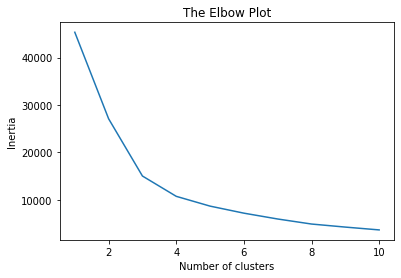

In [24]:
# Analysis on Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X5)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =60,n_iter=4000)
x_tsne = tsne.fit_transform(X5)

tree = list(X['Tree'])
elevation = list(X['Elevation'])
hdt_fire = list(X['Horizontal_Distance_To_Fire_Points'])
data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'tree:{a},elevation:{b},hdt_fire:{c}' for a,b,c in list(zip(tree,elevation,hdt_fire))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE(d2,X5,60,4000).html')

't-SNE(d2,X5,60,4000).html'

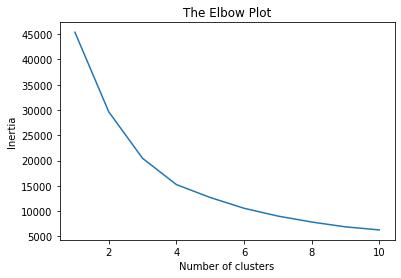

In [27]:
# Analysis on Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X6)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:

# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =60,n_iter=8000)
x_tsne = tsne.fit_transform(X6)

tree = list(X['Tree'])
hdt_hydro = list(X['Horizontal_Distance_To_Hydrology'])
hdt_fire = list(X['Horizontal_Distance_To_Fire_Points'])
data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'tree:{a},hdt_hydro:{b},hdt_fire:{c}' 
                                      for a,b,c in list(zip(tree,hdt_hydro,hdt_fire))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE(d2,X6,60,8000).html')